<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

RANDOM_STATE = 1



## Загрузка данных

Загружаю данные и смотрю, что внутри.

In [2]:
data = pd.read_csv('/datasets/insurance.csv') 
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Таблица размером (5000, 5).
Пропусков нет. Нужен ли тип float64 для возраста взрослого человека? Скорее всего, нет. Можно преобразовать в int64.



In [23]:
data['Возраст'] = data['Возраст'].astype('int64')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int64  
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Посмотрим на статистику. Важно обратить внимание на количество значений в каждой колонке, крайние значения в каждом параметре.

In [3]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Посмотрим на распределение параметров по значениям.

In [6]:
for col in data.columns:
    if col == 'Зарплата':
        print('Зарплата\n', data[col].nunique(), 'уникальных значения')
    else:
        print(data.groupby(col)['Пол'].count())
    print('\n_________________\n')

Пол
0    2505
1    2495
Name: Пол, dtype: int64

_________________

Возраст
18.0    117
19.0    223
20.0    195
21.0    200
22.0    209
23.0    202
24.0    182
25.0    214
26.0    211
27.0    209
28.0    204
29.0    203
30.0    202
31.0    212
32.0    206
33.0    191
34.0    177
35.0    179
36.0    193
37.0    147
38.0    139
39.0    141
40.0    114
41.0    129
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
48.0     26
49.0     37
50.0     27
51.0     21
52.0     22
53.0     11
54.0      7
55.0      9
56.0      5
57.0      2
58.0      2
59.0      3
60.0      2
61.0      1
62.0      1
65.0      1
Name: Пол, dtype: int64

_________________

Зарплата
 524 уникальных значения

_________________

Члены семьи
0    1513
1    1814
2    1071
3     439
4     124
5      32
6       7
Name: Пол, dtype: int64

_________________

Страховые выплаты
0    4436
1     423
2     115
3      18
4       7
5       1
Name: Пол, dtype: int64

_________________



Есть ли дубли?

In [7]:
data.duplicated().sum()

153

Удалим.

In [30]:
data = data.drop_duplicates()

In [31]:
data.shape

(4847, 5)

Посмотрим на матрицу корреляции.

<AxesSubplot:>

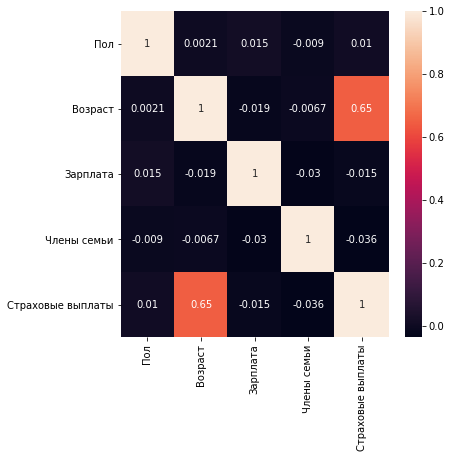

In [10]:
correlation_matrix = data.corr()

plt.figure(figsize= (6, 6))
sns.heatmap(correlation_matrix, annot = True)

Может быть некоторая связь признака "Возраст" с целевым. Бросается в глаза на фоне остальной "беспричинности".



## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 


**Ответ:** Нет.




**Обоснование:** 

Пусть $А$ - обратимая матрица.

Подставим вместо $X$ в формулу обучения $XA$. 

$$
w2 = ((XA)^T (XA))^{-1} (XA)^T y
$$

Можем транспонировать оба произведения.

$$
w2 = ((A)^T(X)^TXA)^{-1} (A)^T(X)^T y
$$

В первой скобке имеем три квадратных матрицы - $(A)^T$, $(X)^TX$, $A$. Обратная матрица в этом случае будет произведением обратных для каждой из этих, перемноженных в обратном порядке.

$$
w2 = A^{-1}((X)^TX)^{-1}((A)^T)^{-1} (A)^T(X)^T y
$$

Здесь выделяется произведение $((A)^T)^{-1} (A)^T$, которое является единичной матрицей. Поэтому сокращаем запись до следующего вида:

$$
w2 = A^{-1}((X)^TX)^{-1}(X)^T y
$$

А теперь видно, что множители левее $A^{-1}$ представляют собой исходный вектор $w$.

$$
w2 = A^{-1}w
$$


Вот ответ на вопрос связи параметров регрессии после шифрования.

Используя это выражение, гораздо проще доказать необходимый тезис, чем я сделала перед этим.

Предсказания исходной регрессии выглядят так:
$$
a = Xw
$$
А регрессии с шифровкой так:
$$
a2 = XAw2
$$
Подставим полученный вектор шифрованных признаков:
$$
a2 = XAA^{-1}w
$$
Снова видим единичную матрицу в произведении $AA^{-1}$.
И получаем:
$$
a2 = Xw
$$
$$
a2 = a
$$
Таким образом, видим, что предсказания остаются теми же.

## Алгоритм преобразования

**Алгоритм**

У нас есть датасет с четырьмя признаками. Матрица Х будет содержать четыре столбца - по количеству признаков обучающей выборки ('Пол', 'Возраст', 'Зарплата', 'Члены семьи'). Это не расширенная матрица, потому что такими преобразованиями займётся сама регрессия.

Для шифровки даных нужна матрица А размерностью 4\*4. Её можно сгенерировать методом numpy.random.normal(). Убедиться, что она обратима, можно методом numpy.linalg.inv(). Необратима - будет ошибка. Обещают, что вероятность этого случая крайне мала, но проверка не повредит. В случае ошибки генерируем новую матрицу и проверяем.

Далее создаём модель регрессии с чистыми данными и модель с зашифрованными данными. Получаем предсказания, сравниваем векторы предсказаний и метрики MSE.

Делаем выводы.

**Обоснование**

Математическое для правомерности такого преобразования - выше. Личные данные пользователей окажутся зашифрованы, ими нельзя будет в дальнейшем воспользоваться, а модель сохранит свои свойства, и предсказания не потеряют свою силу.

## Проверка алгоритма

Подготовим тренировочную и тестовую выборки.

In [11]:

#отделяю целевой признак
target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'] , axis=1)

# Разделяю выборки на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

# обучаю модель и делаю предсказания
model = LinearRegression()
model.fit(features_train, target_train)
predicted = model.predict(features_test)

# расчёт метрик
mse = mean_squared_error(target_test, predicted)

print("MSE =", mse)

r2 = r2_score(target_test, predicted)

print("R2 =", r2)

MSE = 0.10571382800275492
R2 = 0.3237732279242763


In [12]:
# создаёт обратимую матрицу подходящего размера

def get_rand_matrix(data):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1], data.shape[1])) 
        det = np.linalg.det(matrix)
    return matrix

In [13]:
rnd_matrix = get_rand_matrix(features_train)

print(rnd_matrix)

[[-0.83268507 -1.37465819  0.81015312 -1.08325573]
 [-0.03366438  0.09267204 -0.07430696 -0.26985872]
 [-2.14985615  0.77607326  0.92598833 -0.55472048]
 [ 1.17636925 -0.13477575  1.07217098  0.05645157]]


Ошибки не случилось, поэтому используем сгенерированную матрицу для шифрования данных.

In [14]:

features_train_new = features_train @ rnd_matrix
features_test_new = features_test @ rnd_matrix

In [15]:
features_train.head()

,Пол,Возраст,Зарплата,Члены семьи
3186,1,36.0,39400.0,4
632,0,30.0,26300.0,3
577,0,31.0,24600.0,2
2406,0,37.0,37100.0,3
4686,0,25.0,34800.0,1


In [16]:
features_train_new.head()

,0,1,2,3
3186,-84701.671592,30578.708758,36486.363892,-21866.559249
632,-56538.697673,20413.102493,24354.480318,-14597.075013
577,-52885.152245,19094.005404,22779.153684,-13654.376509
2406,-79757.379786,28795.342373,34354.634107,-20589.945201
4686,-74814.659398,27009.531369,32223.608295,-19310.962697


Преобразование произошло, и теперь непонятно, что было в исходном датасете.

In [17]:

model_new = LinearRegression()
model_new.fit(features_train_new, target_train)
predicted_new = model_new.predict(features_test_new)



In [18]:

mse_new = mean_squared_error(target_test, predicted_new)
print("MSE     =", mse)
print("MSE_new =", mse_new)

MSE     = 0.10571382800275492
MSE_new = 0.10571382800310532


In [19]:
r2_new = r2_score(target_test, predicted_new)
print("R2     =", r2)
print("R2_new =", r2_new)

R2     = 0.3237732279242763
R2_new = 0.3237732279220348


Ошибки отличаются в 12-м знаке после запятой - можно считать, что они одинаковые. 

## Вывод

Сначала я дала математическое обоснование сохранения качества линейной регрессии при шифровании данных обратимой матрицей, потом предложила алгоритм реализации и провела проверку алгоритма. В итоге метрика MSE не изменилась, что соответствует теоретическим выводам.